In [2]:
# Mengimpor Library
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


In [3]:
# Menentukan Variabel Kasus
suhu = np.arange (0, 50, 1)
kelembaban = np.arange (0, 140, 1)
cahaya = np.arange (0, 130, 1)
volume = np.arange (0, 3000, 1)


In [4]:
# Menentukan Range Himpunan Fuzzy
suhu_dingin = fuzz.trapmf(suhu, [0, 0, 15, 35])
suhu_panas = fuzz.trapmf(suhu, [15, 35, 36, 36])

kelembaban_kurang = fuzz.trapmf(kelembaban, [0, 0, 50, 90])
kelembaban_banyak = fuzz.trapmf(kelembaban, [50, 90, 100, 100])

cahaya_rendah = fuzz.trapmf(cahaya, [0, 0, 50, 90])
cahaya_tinggi = fuzz.trapmf(cahaya, [50, 90, 100, 100])

volume_sedikit = fuzz.trapmf(volume, [0, 0, 1000, 2000])
volume_banyak = fuzz.trapmf(volume, [1000, 2000, 3000, 3000])

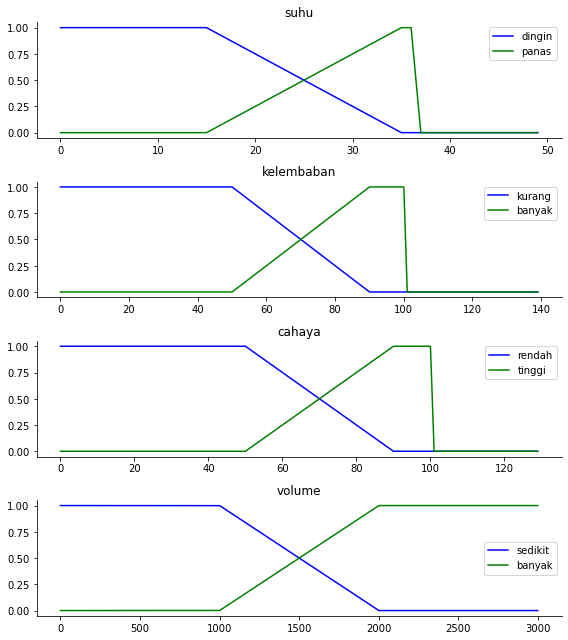

In [5]:
# Membuat Grafik Himpunan Fuzzy
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8,9))

ax0.plot(suhu, suhu_dingin, 'b', linewidth=1.5, label='dingin')
ax0.plot(suhu, suhu_panas, 'g', linewidth=1.5, label='panas')

ax0.set_title('suhu')
ax0.legend()

ax1.plot(kelembaban, kelembaban_kurang, 'b', linewidth=1.5, label='kurang')
ax1.plot(kelembaban, kelembaban_banyak, 'g', linewidth=1.5, label='banyak')

ax1.set_title('kelembaban')
ax1.legend()

ax2.plot(cahaya, cahaya_rendah, 'b', linewidth=1.5, label='rendah')
ax2.plot(cahaya, cahaya_tinggi, 'g', linewidth=1.5, label='tinggi')

ax2.set_title('cahaya')
ax2.legend()

ax3.plot(volume, volume_sedikit, 'b', linewidth=1.5, label='sedikit')
ax3.plot(volume, volume_banyak, 'g', linewidth=1.5, label='banyak')

ax3.set_title('volume')
ax3.legend()

for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()

In [6]:
# Mengimput Nilai Kasus
su = 30
lem = 55
cah = 40

In [7]:
# Menentukan Rule Base
"""
•R1, Jika Suhu Udara panas, Kelembaban Tanah Kurang AND Intensitas cahaya tinggi maka Air yang Digunakan Banyak
•R2, Jika suhu udara panas, kelembaban tanah kurang AND intensitas cahaya rendah maka air yang digunakan banyak
•R3, Jika suhu udara panas, kelembaban tanah banyak AND intensitas cahaya tinggi maka air yang digunakan banyak
•R4, Jika suhu udara panas, kelembaban tanah banyak AND intensitas cahaya rendah maka air yang digunakan sedikit
•R5, Jika suhu udara dingin, kelembaban tanah kurang AND intensitas cahaya tinggi maka air yang digunakan banyak
•R6, Jika suhu udara dingin, kelembaban tanah kurang AND intensitas cahaya rendah maka air yang digunakan sedikit
•R7, Jika suhu udara dingin, kelembaban tanah banyak AND intensitas cahaya tinggi maka air yang digunakan sedikit
•R8, Jika suhu udara dingin, kelembaban tanah banyak AND intensitas cahaya rendah, maka air yang digunakan sedikit

Domain Volume Air:
SEDIKIT --> (3000-Z)/(3000-1000) = fmin; apred[i] = fmin; (3000 - Z) = 2000 * apred[i]; Z = 3000 - (2000 * apred[i])
BANYAK --> (Z-1000)/(3000-1000) = fmin; apred[i] = fmin; (Z - 1000) = 2000 * apred[i]; Z = (2000 * apred[i]) + 2000
""";

In [8]:
# Menentukan Derajat Keanggotaan
a = []
a.append(fuzz.interp_membership(suhu, suhu_dingin, su))
a.append(fuzz.interp_membership(suhu, suhu_panas, su))

b = []
b.append(fuzz.interp_membership(kelembaban, kelembaban_kurang, lem))
b.append(fuzz.interp_membership(kelembaban, kelembaban_banyak, lem))

c = []
c.append(fuzz.interp_membership(cahaya, cahaya_rendah, cah))
c.append(fuzz.interp_membership(cahaya, cahaya_tinggi, cah))

print("Derajat Keanggotaan Suhu")
if a[0] > 0:
    print("dingin: "+str(a[0]))
if a[1] > 0:
    print("panas: "+str(a[1]))

print("Derajat kelembaban Tanah")
if b[0] > 0:
    print("kurang: "+str(b[0]))
if b[1] > 0:
    print("banyak: "+str(b[1]))

print("Derajat Keanggotaan Cahaya")
if c[0] > 0:
    print("rendah: "+str(c[0]))
if c[1] > 0:
    print("tinggi: "+str(c[1]))


Derajat Keanggotaan Suhu
dingin: 0.25
panas: 0.75
Derajat kelembaban Tanah
kurang: 0.875
banyak: 0.125
Derajat Keanggotaan Cahaya
rendah: 1.0


Memodelkan Rule Base dan Inferensi Mamdani
•R1, Jika Suhu Udara panas, Kelembaban tanah Kurang AND Intensitas cahaya tinggi maka Air yang Digunakan banyak •R2, Jika Suhu udara panas, kelembaban tanah kurang AND Intensitas cahaya rendah maka Air yang digunakan banyak •R3, Jika Suhu udara panas, kelembaban tanah banyak AND Intensitas cahaya tinggi maka Air yang digunakan banyak •R4, Jika Suhu udara panas, kelembaban tanah banyak AND Intensitas cahaya rendah maka Air yang digunakan sedikit •R5, Jika Suhu udara dingin, Kelembaban tanah kurang AND Intensitas cahaya tinggi maka Air yang digunakan banyak •R6, Jika Suhu udara dingin, Kelembaban tanah kurang AND Intensitas cahaya rendah maka Air yang digunakan sedikit •R7, Jika Suhu udara dingin, kelembaban tanah banyak AND Intensitas cahaya tinggi maka Air yang digunakan sedikit •R8, Jika Suhu udara dingin, kelembaban tanah banyak AND Intensitas cahaya rendah, maka Air yang digunakan sedikit

SEDIKIT --> (3000-Z)/(3000-1000) = fmin; apred[i] = fmin; (3000 - Z) = 2000 * apred[i]; Z = 3000 - (2000 * apred[i]) BANYAK --> (Z-1000)/(3000-1000) = fmin; apred[i] = fmin; (Z - 1000) = 2000 * apred[i]; Z = (2000 * apred[i]) + 2000

In [9]:
# Memodelkan Rule Base dan Inferensi Tsukamoto

x1 = np.fmin(a[0], b[0])
apred1 = np.fmin(x1, c[0])
print("Sedikit, Nilai apred1 = ", apred1)
z1 = 3000 - (1000 * apred1)
print("Nilai z1 = ", z1)

x2 = np.fmin(a[0], b[0])
apred2 = np.fmin(x2, c[1])
print("Sedikit, Nilai apred2 = ", apred2)
z2 = 3000 - (1000 * apred2)
print("Nilai z2 = ", z2)

x3 = np.fmin(a[0], b[1])
apred3 = np.fmin(x3, c[0])
print("Sedikit, Nilai apred3 = ", apred3)
z3 = 3000 - (1000 * apred3)
print("Nilai z3 = ", z3)

x4 = np.fmin(a[0], b[1])
apred4 = np.fmin(x4, c[1])
print("Banyak, Nilai apred4 = ", apred4)
z4 = (1000 * apred4) + 2000
print("Nilai z4 = ", z4)

x5 = np.fmin(a[1], b[0])
apred5 = np.fmin(x5, c[0])
print("Sedikit, Nilai apred5 = ", apred5)
z5 = 3000 - (1000 * apred5)
print("Nilai z5 = ", z5)

x6 = np.fmin(a[1], b[0])
apred6 = np.fmin(x6, c[1])
print("Banyak, Nilai apred6 = ", apred6)
z6 = (1000 * apred6) + 2000
print("Nilai z6 = ", z6)

x7 = np.fmin(a[1], b[1])
apred7 = np.fmin(x7, c[0])
print("Banyak, Nilai apred7 = ", apred7)
z7 = (1000 * apred7) + 2000
print("Nilai z7 = ", z7)

x8 = np.fmin(a[1], b[1])
apred8 = np.fmin(x8, c[1])
print("Banyak, Nilai apred8 = ", apred8)
z8 = (1000 * apred8) + 2000
print("Nilai z8 = ", z8)


Sedikit, Nilai apred1 =  0.25
Nilai z1 =  2750.0
Sedikit, Nilai apred2 =  0.0
Nilai z2 =  3000.0
Sedikit, Nilai apred3 =  0.125
Nilai z3 =  2875.0
Banyak, Nilai apred4 =  0.0
Nilai z4 =  2000.0
Sedikit, Nilai apred5 =  0.75
Nilai z5 =  2250.0
Banyak, Nilai apred6 =  0.0
Nilai z6 =  2000.0
Banyak, Nilai apred7 =  0.125
Nilai z7 =  2125.0
Banyak, Nilai apred8 =  0.0
Nilai z8 =  2000.0


In [12]:
#Defazzifikasi
vol = fuzz.defuz(volume, komposisi, 'centroid')
print("volume air = ", vol)


AttributeError: module 'skfuzzy' has no attribute 'defuz'